In [ ]:
# DATA MINING PROJECT : STOCK PRICE PREDICTION

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
# reading the csv file

In [ ]:
df = pd.read_csv('/content/AMZN.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5879 entries, 0 to 5878
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5879 non-null   object 
 1   Open       5879 non-null   float64
 2   High       5879 non-null   float64
 3   Low        5879 non-null   float64
 4   Close      5879 non-null   float64
 5   Adj Close  5879 non-null   float64
 6   Volume     5879 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 321.6+ KB


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [ ]:
# Pre processing the data

In [ ]:
# Checking if there are any null values in any of the columns

In [ ]:
df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [ ]:
# Replacing ',' in the close and volume column

In [ ]:
df["Close"] = df["Close"].replace(',','').astype(float)
df['Close']

0          1.958333
1          1.729167
2          1.708333
3          1.635417
4          1.427083
           ...     
5874    3008.729980
5875    2954.909912
5876    2960.469971
5877    3128.989990
5878    2999.860107
Name: Close, Length: 5879, dtype: float64

In [ ]:
df["Volume"] = df["Volume"].replace(',','').astype(float)
df["Volume"]

0       72156000.0
1       14700000.0
2        6106800.0
3        5467200.0
4       18853200.0
           ...    
5874     6449100.0
5875     8892600.0
5876     6117900.0
5877     6948800.0
5878     5630400.0
Name: Volume, Length: 5879, dtype: float64

In [ ]:
# Creating a rolling window of size 7 and calculating the rolling mean for our data

In [ ]:
df.rolling(7).mean().head(20)

<ipython-input-14-311aaf343e3d>:1: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')



,Open,High,Low,Close,Adj Close,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,1.767857,1.802083,1.559524,1.622024,1.622024,2.071389e+07
7,1.635417,1.680059,1.492559,1.568452,1.568452,1.164840e+07
8,1.586310,1.630952,1.467262,1.540178,1.540178,1.020189e+07
9,1.555060,1.598214,1.446429,1.511161,1.511161,9.825600e+06


In [ ]:
# Plotting the graph with rolling average

<ipython-input-16-6ed5bf4b95a7>:2: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')



<Axes: >

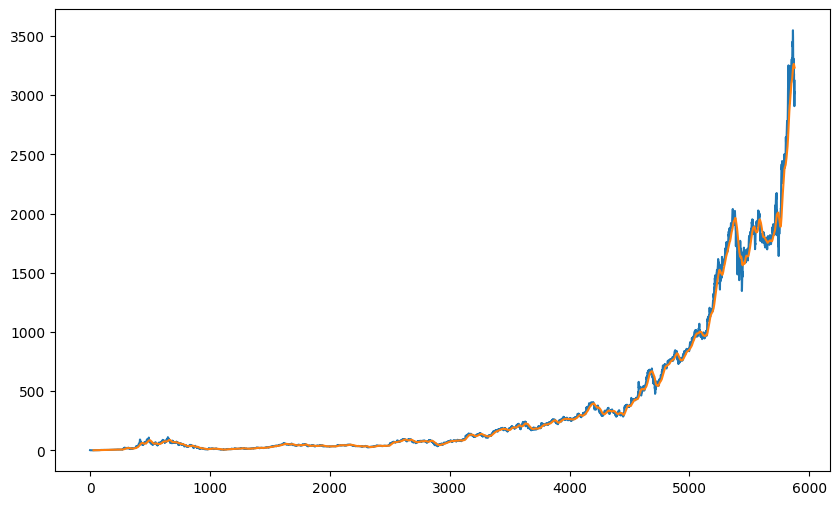

In [ ]:
df["Open"].plot(figsize=(10,6))
df.rolling(30).mean()['Close'].plot()

<Axes: >

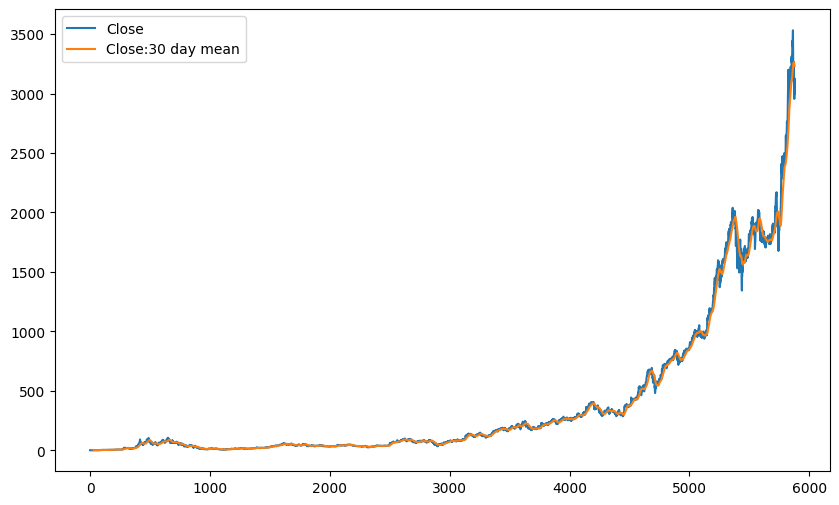

In [ ]:
df["Close:30 day mean"] = df["Close"].rolling(30).mean()
df[['Close','Close:30 day mean']].plot(figsize=(10,6))

In [ ]:
# Exploratory data analysis

In [ ]:
# finding the range of dates we have stock prices for and the total no. of days

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
print(f'DataFrame contains stock prices bewteen {df.Date.min()} {df.Date.max()} ')
print(f'Total number of days = {(df.Date.max() - df.Date.min()).days} days')

DataFrame contains stock prices bewteen 1997-05-15 00:00:00 2020-09-23 00:00:00 
Total number of days = 8532 days


<Axes: >

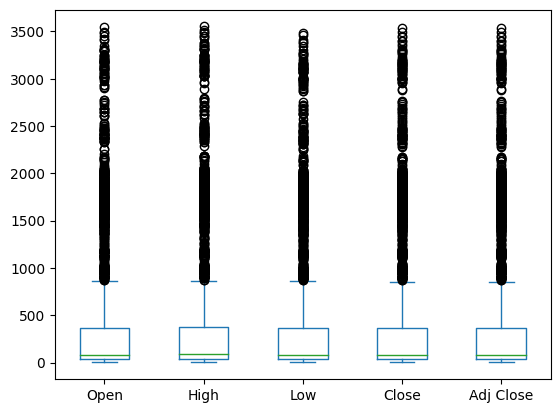

In [ ]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [ ]:
# Setting layout for our plot

In [ ]:
layout= go.Layout(
    title="Stock Prices of Amazon",
    xaxis=dict(
     title="Date",
     titlefont=dict(family="Courier New, monospace", size=18, color="#7f7f7f")
        ),
    yaxis=dict(
        title="Price",
        titlefont=dict(family="Courier New, monospace", size=18, color="#7f7f7f")
        )
    )
adata = [{'x':df["Date"], 'y':df["Close"]}]
plot1 = go.Figure(data=adata, layout=layout)

In [ ]:
iplot(plot1)

In [ ]:
# BUILDING THE MODEL USING LINEAR REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
# Splitting the data into training and test data

In [ ]:
X = np.array(df.index).reshape(-1,1)
# Y -> dependent variable
Y = df["Close"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=101)

In [ ]:
# Feature Scaling

In [ ]:
scaler = StandardScaler().fit(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Creating a linear model

In [ ]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Plot actual and predicted values for train dataset

In [ ]:
trace0 = go.Scatter(
    x = X_test.T[0],
    y = Y_train,
    mode="markers",
    name="Actual"
)
trace1 = go.Scatter(
    x = X_test.T[0],
    y = lm.predict(X_train).T,
    mode="lines",
    name="Predicted"
)
adata = [trace0,trace1]
layout.xaxis.title.text = "Day"
plot2 = go.Figure(data=adata, layout=layout)

In [ ]:
iplot(plot2)

In [ ]:
# Calculating scores for model evaluation
scores = f'''
{"Metric".ljust(10)}{"Train".center(20)}
{"r2_score".ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{"MSE".ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train        
r2_score  0.5592067418376175	0.5690219912388486
MSE       173646.01765965906	166192.44500970046

